In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [ ]:
from google.colab import files
files.upload()

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
def count_zeros(data):
    count=0
    for i in data:
        if i==0:
            count+=1
    return count

In [6]:
statistics_of_data = []
for col in ['gender', 'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'smoking_status',	'stroke']:
    statistics_of_data.append((col,
                             'categorical',
                             df[col].notnull().sum(),
                             f'{df[col].notnull().sum()/df.shape[0]*100}%',
                             count_zeros(df[col]),
                             df[col].nunique(),
                             df[col].mode()[0]

                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,gender,categorical,5110,100.0%,0,3,Female
1,hypertension,categorical,5110,100.0%,4612,2,0
2,heart_disease,categorical,5110,100.0%,4834,2,0
3,ever_married,categorical,5110,100.0%,0,2,Yes
4,work_type,categorical,5110,100.0%,0,5,Private
5,Residence_type,categorical,5110,100.0%,0,2,Urban
6,smoking_status,categorical,5110,100.0%,0,4,never smoked
7,stroke,categorical,5110,100.0%,4861,2,0


In [7]:
num_vars = ['age', 'avg_glucose_level', 'bmi']
statistics_of_data1 = []
for col in num_vars:
    statistics_of_data1.append((col,
                             'datetime',
                             df[col].notnull().sum(),
                             f'{df[col].notnull().sum()/df.shape[0]*100}%',
                             count_zeros(df[col]),
                             df[col].min(),
                             df[col].max(),
                             df[col].mode()[0]

                             ))

stats_df1 = pd.DataFrame(statistics_of_data1, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Min', 'Max','Most Common',])
stats_df1

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Most Common
0,age,datetime,5110,100.0%,0,0.08,82.00,78.00
1,avg_glucose_level,datetime,5110,100.0%,0,55.12,271.74,93.88
2,bmi,datetime,4909,96.0665362035225%,0,10.30,97.60,28.70


In [8]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
df = df[df['gender'].isin(['Male', 'Female'])]
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


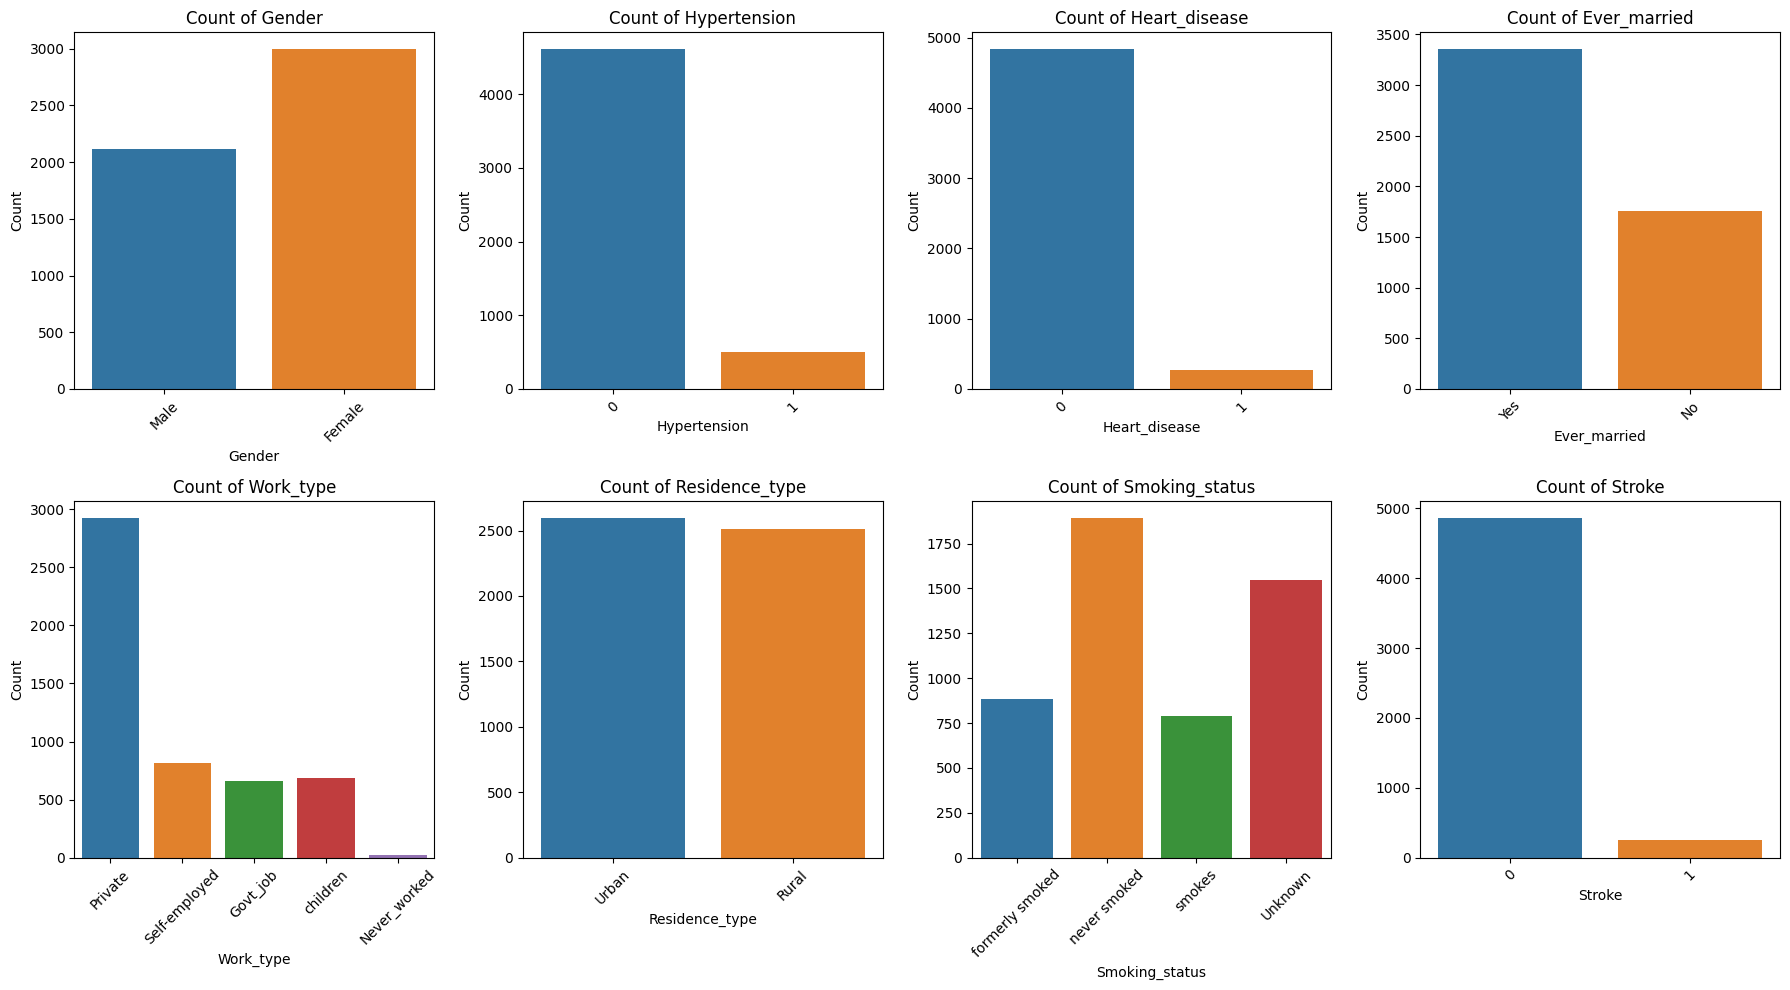

In [10]:
cat_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Set up the matplotlib figure
n_cols = 4
n_rows = int(len(cat_vars) / n_cols) + (len(cat_vars) % n_cols > 0)
plt.figure(figsize=(18, 10))

# Loop to create the countplots
for i, var in enumerate(cat_vars):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=var)

    plt.title(f'Count of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


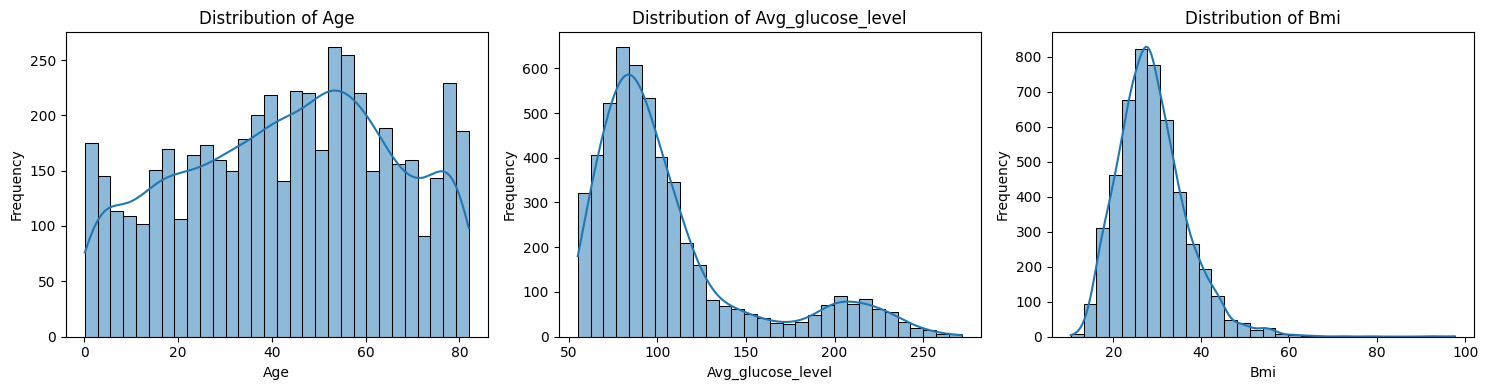

In [11]:
# Set up the matplotlib figure
n_cols = 3  # Number of columns of subplots
n_rows = int(len(num_vars) / n_cols) + (len(num_vars) % n_cols > 0)

plt.figure(figsize=(15, 4))

# Loop to create the distribution plots
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i+1)

    # Create a distribution plot
    sns.histplot(data=df, x=var, kde=True, bins=30)

    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the plots

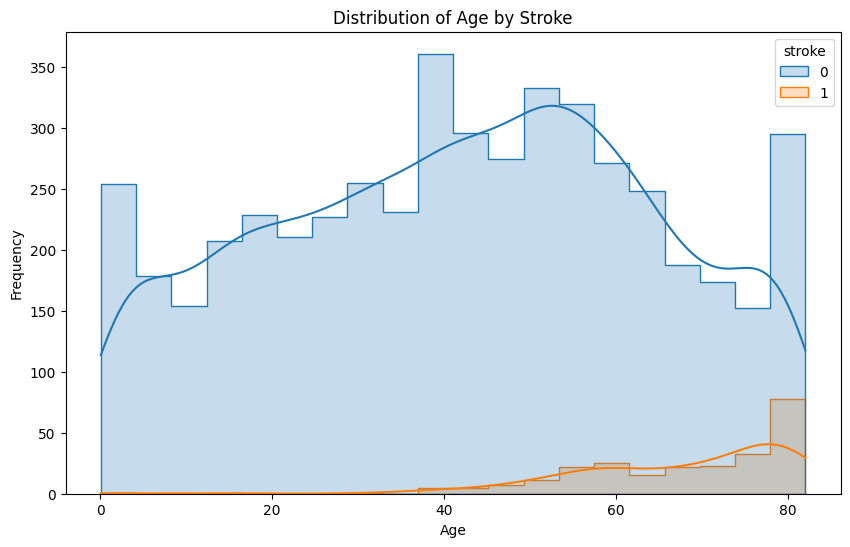

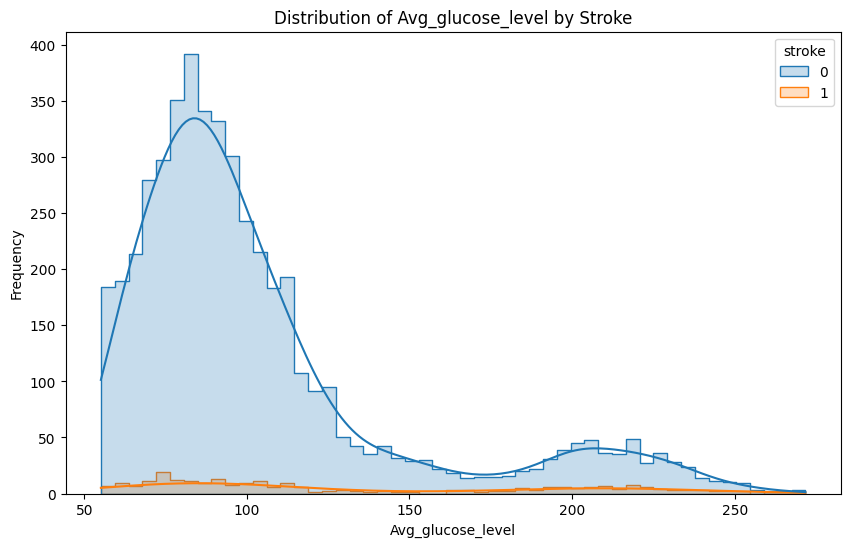

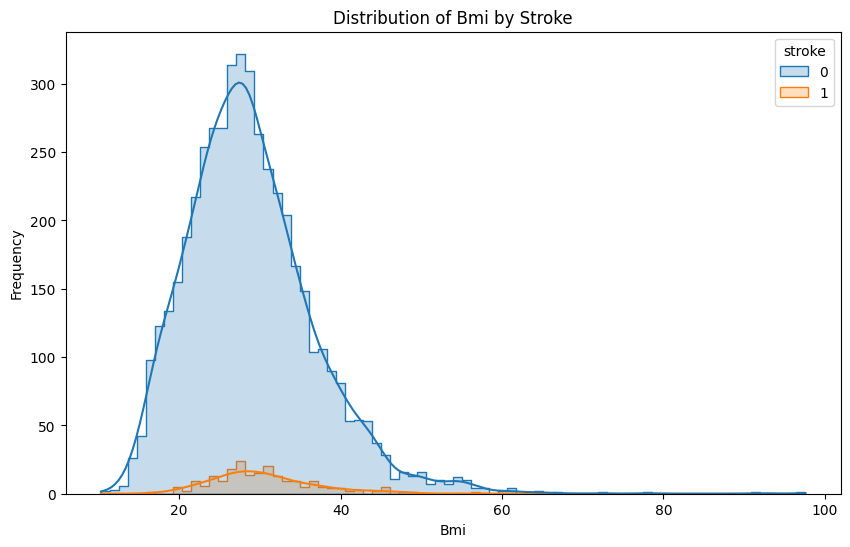

In [12]:
# Loop through numerical variables
for var in num_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, hue='stroke', kde=True, element='step')
    plt.title(f'Distribution of {var.capitalize()} by Stroke')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')
    plt.show()


In [13]:
df['stroke'].sum() #249

df[df['age']>60]['stroke'].sum() # 177
# 177 / 249 = 71.1%

df[(df['age'] < 60) & (df['age'] > 30)]['stroke'].sum() # 66
# 66 / 249 = 26.5%

66

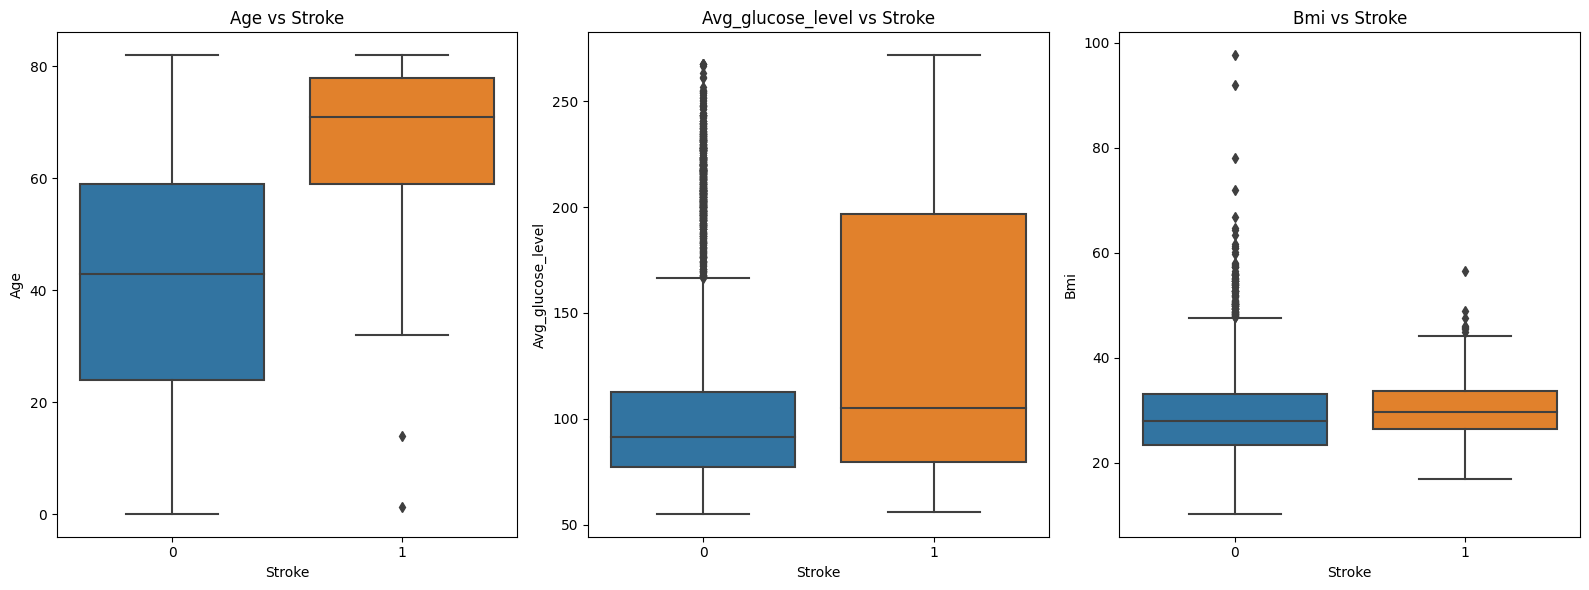

In [14]:
# Loop through each numerical variable and create a boxplot

fig, axes = plt.subplots(1, len(num_vars), figsize=(16, 6))

for i, var in enumerate(num_vars):
    sns.boxplot(data=df, x='stroke', y=var, ax=axes[i])
    axes[i].set_title(f'{var.capitalize()} vs Stroke')
    axes[i].set_xlabel('Stroke')
    axes[i].set_ylabel(var.capitalize())

plt.tight_layout()
plt.show()

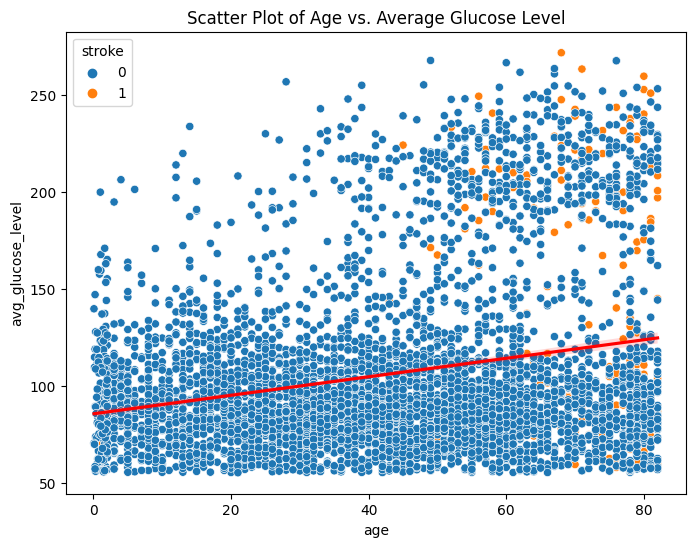

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level',hue='stroke')
plt.title('Scatter Plot of Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')

sns.regplot(data=df, x='age', y='avg_glucose_level', scatter=False, color='red')

plt.show()

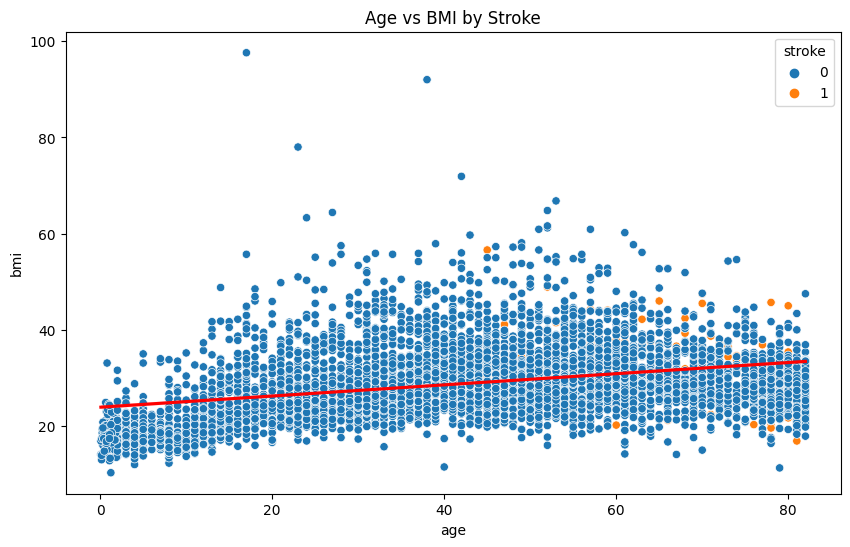

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.title('Age vs BMI by Stroke')
plt.xlabel('Age')
plt.ylabel('BMI')

sns.regplot(data=df, x='age', y='bmi', scatter=False, color='red')

plt.show()

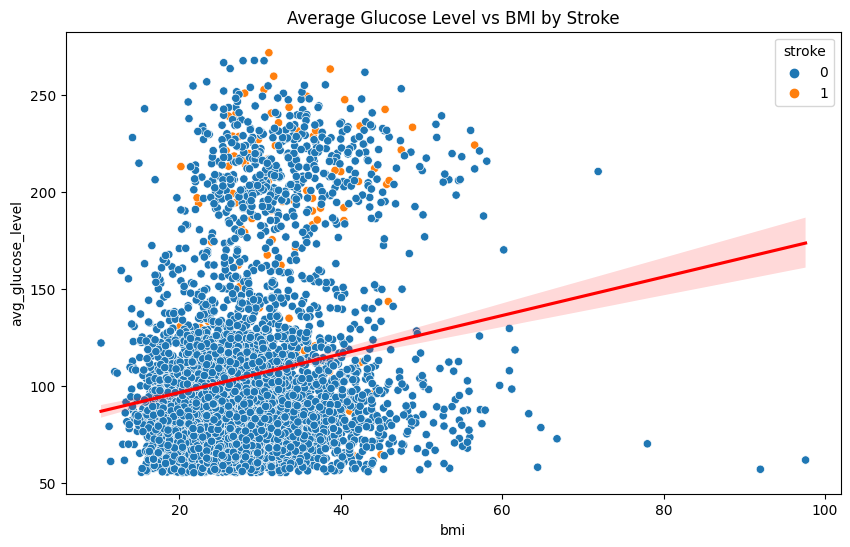

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='stroke')
plt.title('Average Glucose Level vs BMI by Stroke')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')

sns.regplot(data=df, x='bmi', y='avg_glucose_level', scatter=False, color='red')

plt.show()
# higher BMI tend to have higher avg_glucose_level

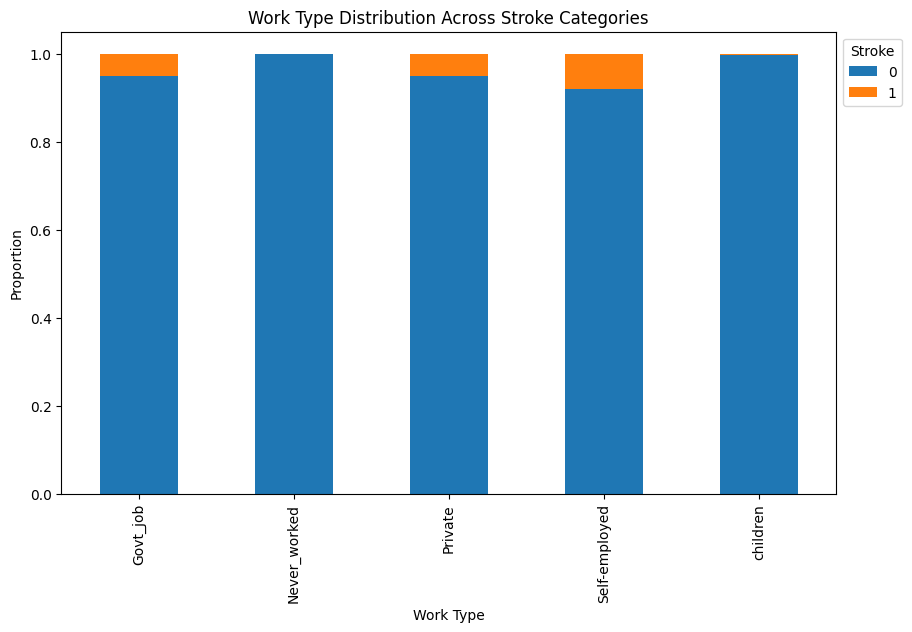

In [18]:
# Creating a normalized stacked bar plot
work_stroke = pd.crosstab(df['work_type'], df['stroke'], normalize='index')
work_stroke.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Work Type Distribution Across Stroke Categories')
plt.xlabel('Work Type')
plt.ylabel('Proportion')
plt.legend(title='Stroke', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


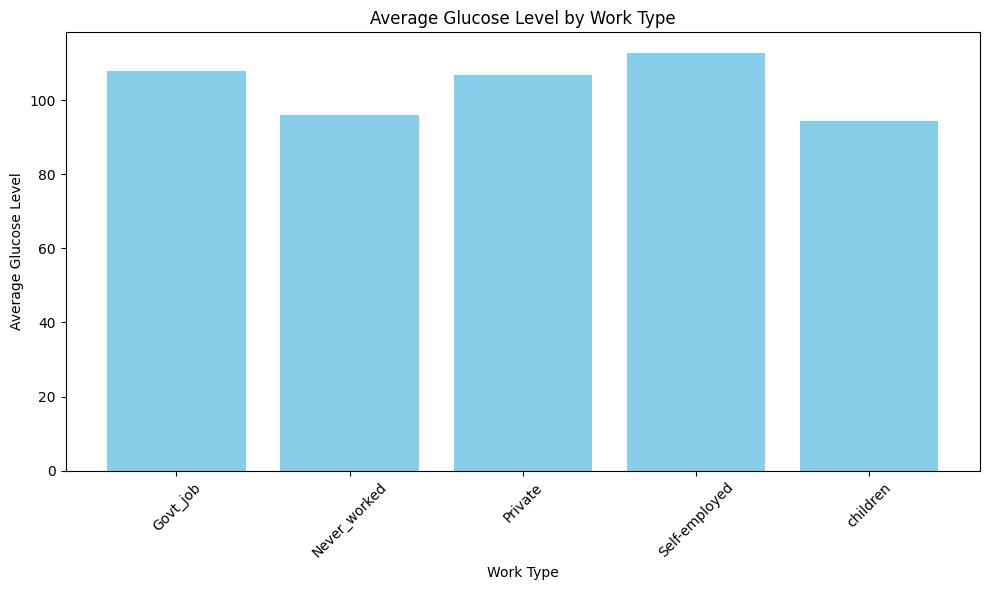

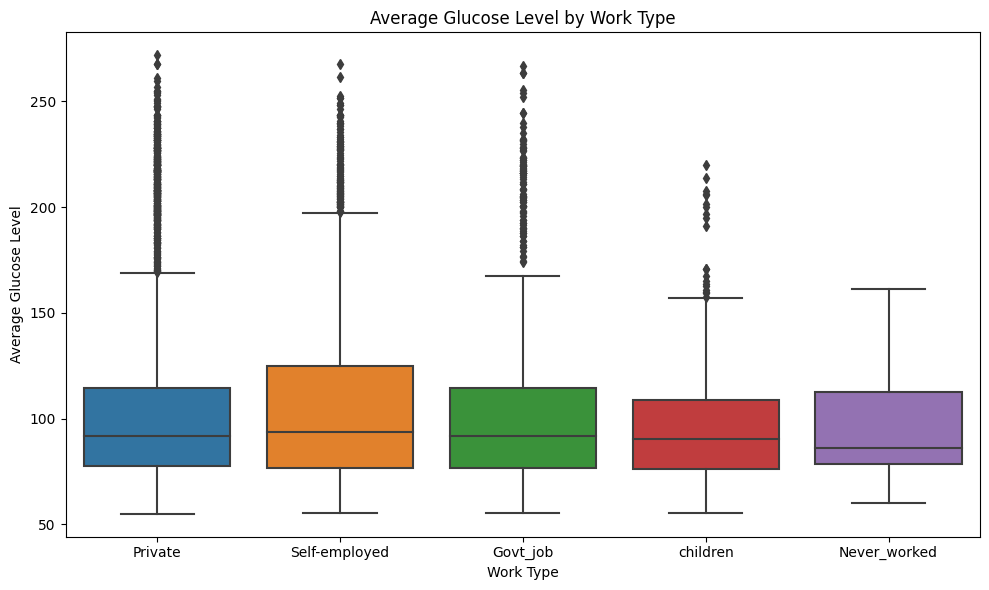

In [19]:
grouped_data = df.groupby("work_type")["avg_glucose_level"].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data["work_type"], grouped_data["avg_glucose_level"], color='skyblue')
plt.xlabel("Work Type")
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Level by Work Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



import scipy.stats as stats

plt.figure(figsize=(10, 6))
sns.boxplot(x="work_type", y="avg_glucose_level", data=df)
plt.xlabel("Work Type")
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Level by Work Type")

# Show the plot
plt.tight_layout()
plt.show()

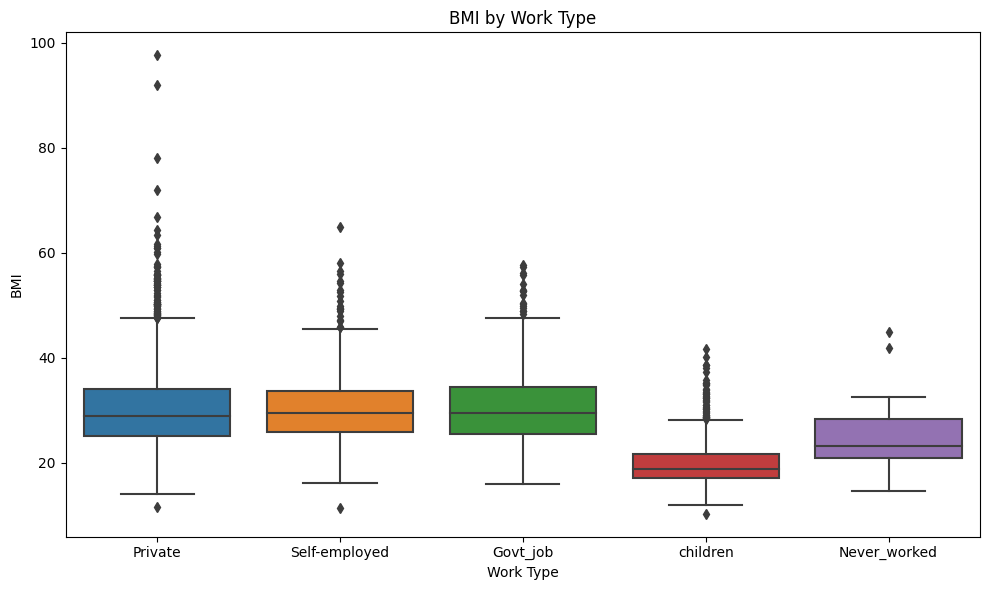

In [20]:
# grouped_data = df.groupby("work_type")["bmi"].mean().reset_index()

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(grouped_data["work_type"], grouped_data["bmi"], color='skyblue')
# plt.xlabel("Work Type")
# plt.ylabel("BMI")
# plt.title("BMI by Work Type")
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# # Show the plot
# plt.tight_layout()
# plt.show()


import scipy.stats as stats

plt.figure(figsize=(10, 6))
sns.boxplot(x="work_type", y="bmi", data=df)
plt.xlabel("Work Type")
plt.ylabel("BMI")
plt.title("BMI by Work Type")

# Show the plot
plt.tight_layout()
plt.show()

# workers have higher BMI in general, and higher BMI tend to have higher avg_glucose_level, and thus more likely to get stoke

<ipython-input-21-50b95adb8338>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop(columns=['id']).corr()


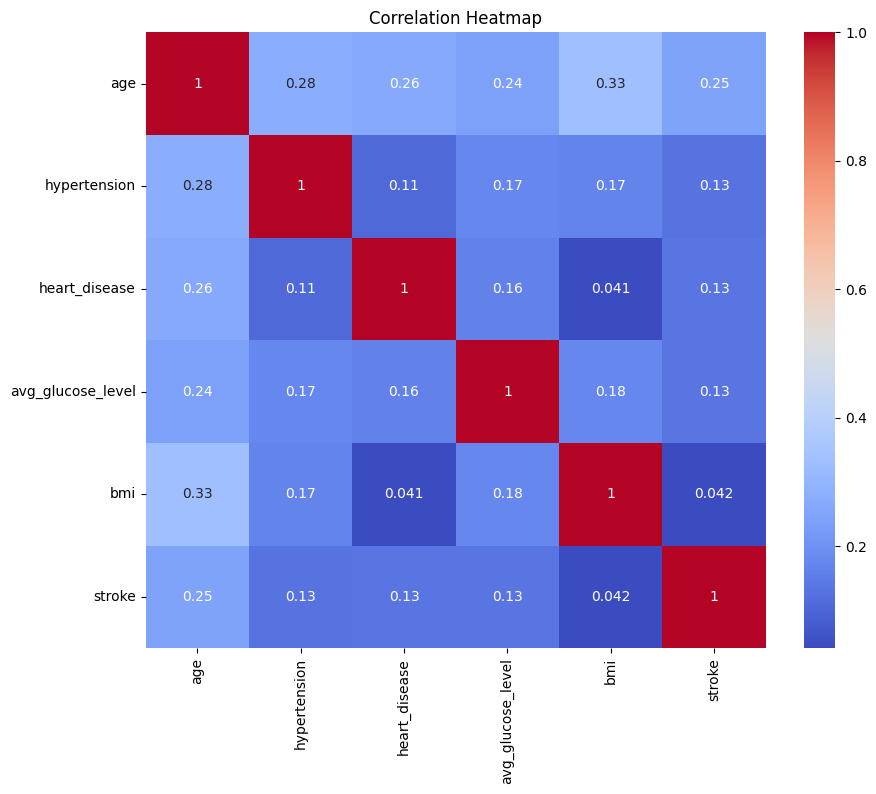

In [21]:
corr_matrix = df.drop(columns=['id']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data Preparation

Skewness of BMI: 1.05


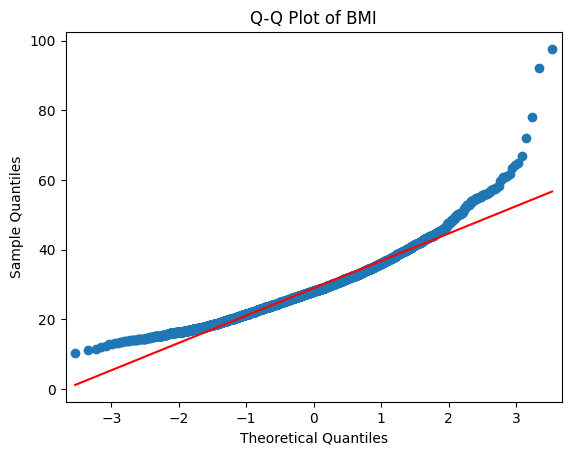

In [22]:
#null variables in the bmi col
from scipy.stats import skew

bmi_skewness = skew(df['bmi'].dropna())  # Drop NA values to avoid errors
print(f"Skewness of BMI: {bmi_skewness:.2f}")

sm.qqplot(df['bmi'].dropna(), line='s')
plt.title('Q-Q Plot of BMI')
plt.show()

In [23]:
median_bmi_female = df[df['gender'] == 'Female']['bmi'].median()
median_bmi_male = df[df['gender'] == 'Male']['bmi'].median()

df.loc[(df['bmi'].isnull()) & (df['gender'] == 'Female'), 'bmi'] = median_bmi_female
df.loc[(df['bmi'].isnull()) & (df['gender'] == 'Male'), 'bmi'] = median_bmi_male

In [24]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Display the new DataFrame
print(df_encoded.head())
df_encoded

      id   age  avg_glucose_level   bmi  gender_Male  hypertension_1  \
0   9046  67.0             228.69  36.6            1               0   
1  51676  61.0             202.21  27.8            0               0   
2  31112  80.0             105.92  32.5            1               0   
3  60182  49.0             171.23  34.4            0               0   
4   1665  79.0             174.12  24.0            0               1   

   heart_disease_1  ever_married_Yes  work_type_Never_worked  \
0                1                 1                       0   
1                0                 1                       0   
2                1                 1                       0   
3                0                 1                       0   
4                0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        

,id,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,51676,61.0,202.21,27.8,0,0,0,1,0,0,1,0,0,0,1,0,1
2,31112,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,60182,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1665,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,27.8,0,1,0,1,0,1,0,0,1,0,1,0,0
5106,44873,81.0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0,0
5107,19723,35.0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0,0
5108,37544,51.0,166.29,25.6,1,0,0,1,0,1,0,0,0,1,0,0,0


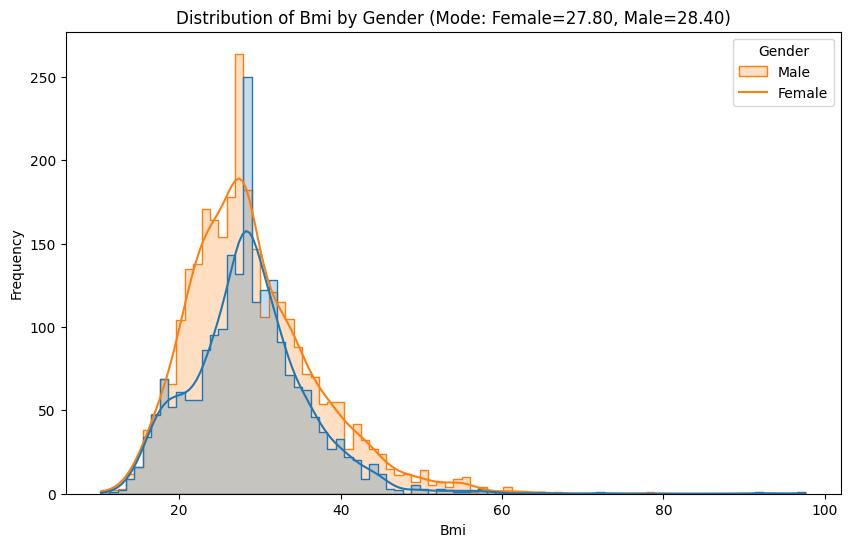

In [25]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x=df['bmi'], hue='gender', kde=True, element='step')
# plt.title(f'Distribution of {var.capitalize()} by Gender')
# plt.xlabel(var.capitalize())
# plt.ylabel('Frequency')
# plt.show()

# # find the peak for male and female
# df[df['gender'] == 'Female']['bmi'].mode(), df[df['gender'] == 'Male']['bmi'].mode()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['bmi'], hue='gender', kde=True, element='step')

# Calculate the mode for each gender group
female_mode = df[df['gender'] == 'Female']['bmi'].mode().values[0]
male_mode = df[df['gender'] == 'Male']['bmi'].mode().values[0]

# Set custom labels for the legend
plt.title(f'Distribution of {var.capitalize()} by Gender (Mode: Female={female_mode:.2f}, Male={male_mode:.2f})')
plt.xlabel(var.capitalize())
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Male', 'Female'])

plt.show()

Statistical Analysis

In [26]:
#Initialize a list to store t-test results
t_test_results = []

# Loop through numerical variables and compute the t-test
for var in num_vars:
    group0 = df[df['stroke'] == 0][var].dropna()  # No stroke
    group1 = df[df['stroke'] == 1][var].dropna()  # Stroke

    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test (does not assume equal variances)

    t_test_results.append((var, t_stat, p_val))

# Create a DataFrame to display t-test results
t_test_df = pd.DataFrame(t_test_results, columns=['Variable', 'T-Statistic', 'P-Value'])
print(t_test_df)

            Variable  T-Statistic       P-Value
0                age   -29.681861  2.175773e-95
1  avg_glucose_level    -6.984385  2.373124e-11
2                bmi    -3.316937  1.024176e-03


In [27]:
from scipy.stats import chi2_contingency

# Perform Chi-Square Test for each categorical variable
for var in cat_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(df[var], df['stroke'])

    # Perform the Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print the variable being tested and the p-value
    print(f"{var} vs Stroke: Chi2 = {chi2}, p-value = {p}")

    # Check if p-value is less than 0.05 (common significance level)
    if p < 0.05:
        print(f"  => The variable '{var}' is statistically significant.\n")
    else:
        print(f"  => The variable '{var}' is NOT statistically significant.\n")

gender vs Stroke: Chi2 = 0.340002536046177, p-value = 0.5598277580669416
  => The variable 'gender' is NOT statistically significant.

hypertension vs Stroke: Chi2 = 81.57314462043591, p-value = 1.688936253410575e-19
  => The variable 'hypertension' is statistically significant.

heart_disease vs Stroke: Chi2 = 90.22943664078221, p-value = 2.120831133146208e-21
  => The variable 'heart_disease' is statistically significant.

ever_married vs Stroke: Chi2 = 58.86780922483486, p-value = 1.6862856191673454e-14
  => The variable 'ever_married' is statistically significant.

work_type vs Stroke: Chi2 = 49.1591485868476, p-value = 5.40903546949726e-10
  => The variable 'work_type' is statistically significant.

Residence_type vs Stroke: Chi2 = 1.0749713079092142, p-value = 0.29982523877153633
  => The variable 'Residence_type' is NOT statistically significant.

smoking_status vs Stroke: Chi2 = 29.22572707549827, p-value = 2.0077041756108317e-06
  => The variable 'smoking_status' is statistica

Predictive Model

In [28]:
#Logistic Regression
model = sm.Logit(df['stroke'], sm.add_constant(df[['age', 'avg_glucose_level', 'bmi']]))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.156566
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5109
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.1962
Time:                        02:35:55   Log-Likelihood:                -799.90
converged:                       True   LL-Null:                       -995.14
Covariance Type:            nonrobust   LLR p-value:                 2.556e-84
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.6561      0.500    -15.311      0.000      -8.636      -6.676
age     

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

# Specify predictors and outcome variable
X = df[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
y = df['stroke']

# Handle categorical variables by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))



Accuracy: 0.949119373776908

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [30]:
import xgboost as xgb

# Instantiate an XGBoost classifier object
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', scale_pos_weight=20, use_label_encoder=False, eval_metric='logloss', seed=42)

# Fit the classifier to the training set
xg_clf.fit(X_train_scaled, y_train)

# Predict the labels of the test set
predictions_xgb = xg_clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions_xgb))
print("\nClassification Report:\n", classification_report(y_test, predictions_xgb))


Accuracy: 0.9129158512720157

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.16      0.18      0.17        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.56      1022
weighted avg       0.92      0.91      0.92      1022



In [31]:
from sklearn.utils import shuffle

# Separate the instances of each class
df_majority = df_encoded[df_encoded['stroke_1'] == 0]
df_minority = df_encoded[df_encoded['stroke_1'] == 1]


# Get the number of instances for the minority class
minority_count = len(df_minority)

# Randomly sample instances from the majority class
df_majority_downsampled = df_majority.sample(minority_count, random_state=42)

# Concatenate the downsampled majority class dataframe with the minority class dataframe
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Optionally shuffle the resulting dataframe
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)


In [32]:
#Logistic Regression
model = sm.Logit(df_balanced['stroke_1'], sm.add_constant(df_balanced[['age', 'avg_glucose_level', 'bmi']]))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               stroke_1   No. Observations:                  498
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                     inf
Time:                        02:36:02   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.8608      0.730     -6.661      0.000      -6.291      -3.431
age          

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

X = df_balanced[num_vars]
y = df_balanced['stroke_1']

# Define preprocessor - StandardScaler in this case for numerical variables
preprocessor = StandardScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Construct pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.71

Confusion Matrix:
 [[33 17]
 [12 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69        50
           1       0.69      0.76      0.72        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



In [34]:
X = df_balanced[num_vars]
y = df_balanced['stroke_1']

# Define preprocessor - StandardScaler in this case for numerical variables
preprocessor = StandardScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Construct pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.66

Confusion Matrix:
 [[33 17]
 [17 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66        50
           1       0.66      0.66      0.66        50

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [35]:
from sklearn.model_selection import GridSearchCV

X = df_balanced[num_vars]
y = df_balanced['stroke_1']

# Define preprocessor - StandardScaler in this case for numerical variables
preprocessor = StandardScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Construct pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define parameter grid
param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predictions
predictions = grid_search.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Best Parameters:  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1}
Accuracy: 0.72

Confusion Matrix:
 [[30 20]
 [ 8 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.60      0.68        50
           1       0.68      0.84      0.75        50

    accuracy                           0.72       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.73      0.72      0.72       100



In [36]:
from sklearn.tree import DecisionTreeClassifier
X = df_balanced[num_vars]
y = df_balanced['stroke_1']

# Define preprocessor - StandardScaler in this case for numerical variables
preprocessor = StandardScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Construct pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predictions
predictions = grid_search.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
Accuracy: 0.68

Confusion Matrix:
 [[33 17]
 [15 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67        50
           1       0.67      0.70      0.69        50

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [37]:
#add num and cat vars for prediction
from sklearn.tree import DecisionTreeClassifier
X = df_balanced[['age', 'avg_glucose_level', 'bmi',
       'hypertension_1', 'heart_disease_1', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]
y = df_balanced['stroke_1']

# Define preprocessor - StandardScaler in this case for numerical variables
preprocessor = StandardScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Construct pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predictions
predictions = grid_search.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Best Parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
Accuracy: 0.66

Confusion Matrix:
 [[31 19]
 [15 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.65        50
           1       0.65      0.70      0.67        50

    accuracy                           0.66       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.66      0.66      0.66       100



In [38]:
df_stroke = df[df['stroke'] == 1]
print(df_stroke.shape[0])


249


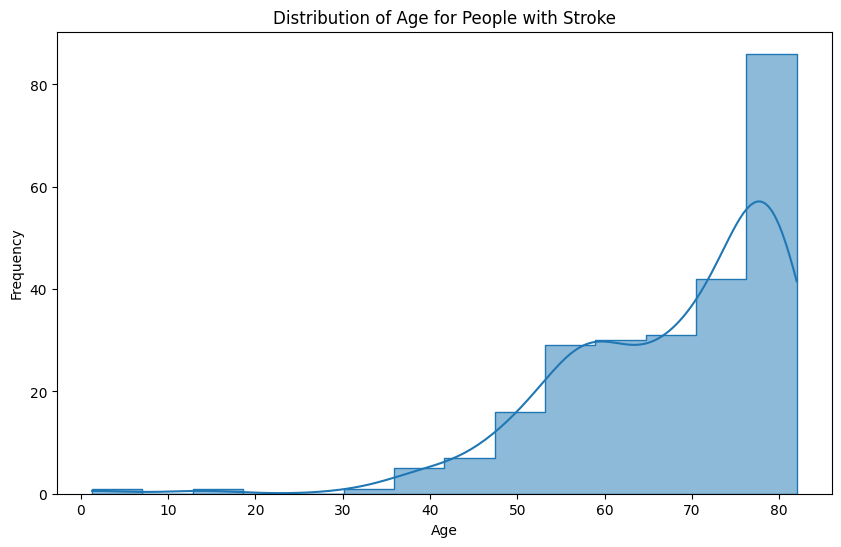

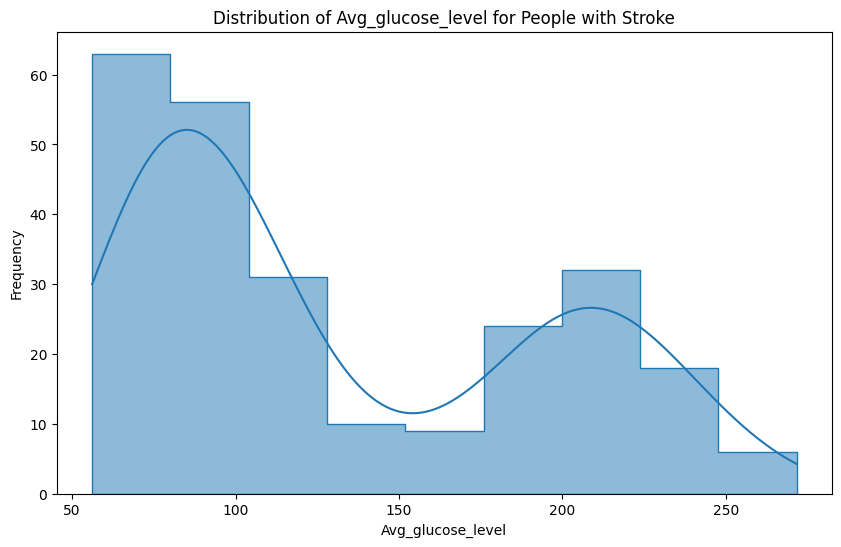

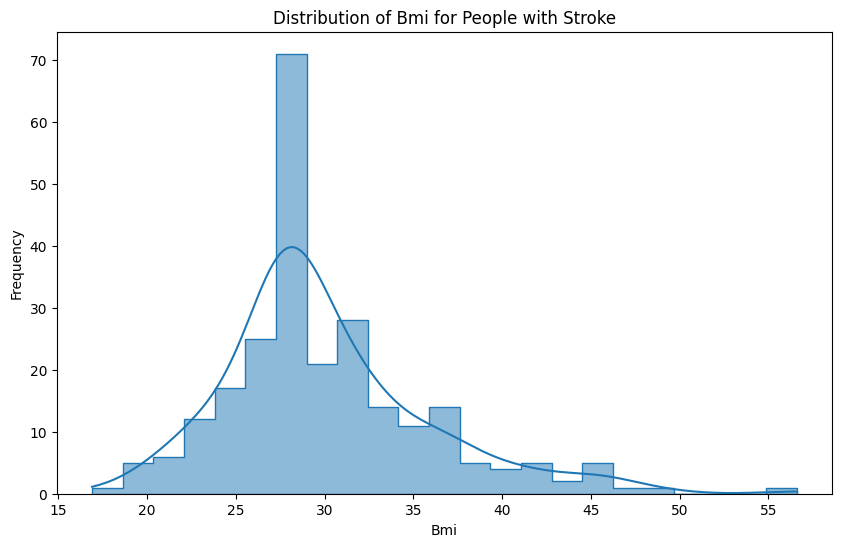

28.4


In [39]:
# Loop through numerical variables
for var in num_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_stroke, x=var, kde=True, element='step')
    plt.title(f'Distribution of {var.capitalize()} for People with Stroke')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')
    plt.show()

print(df['bmi'].mode().values[0])

In [40]:
df_stroke_0_40 = df[(df['stroke'] == 1) & (df['age'] <= 40) & (df['age'] >= 0)]
print(df_stroke_0_40.shape[0])

8


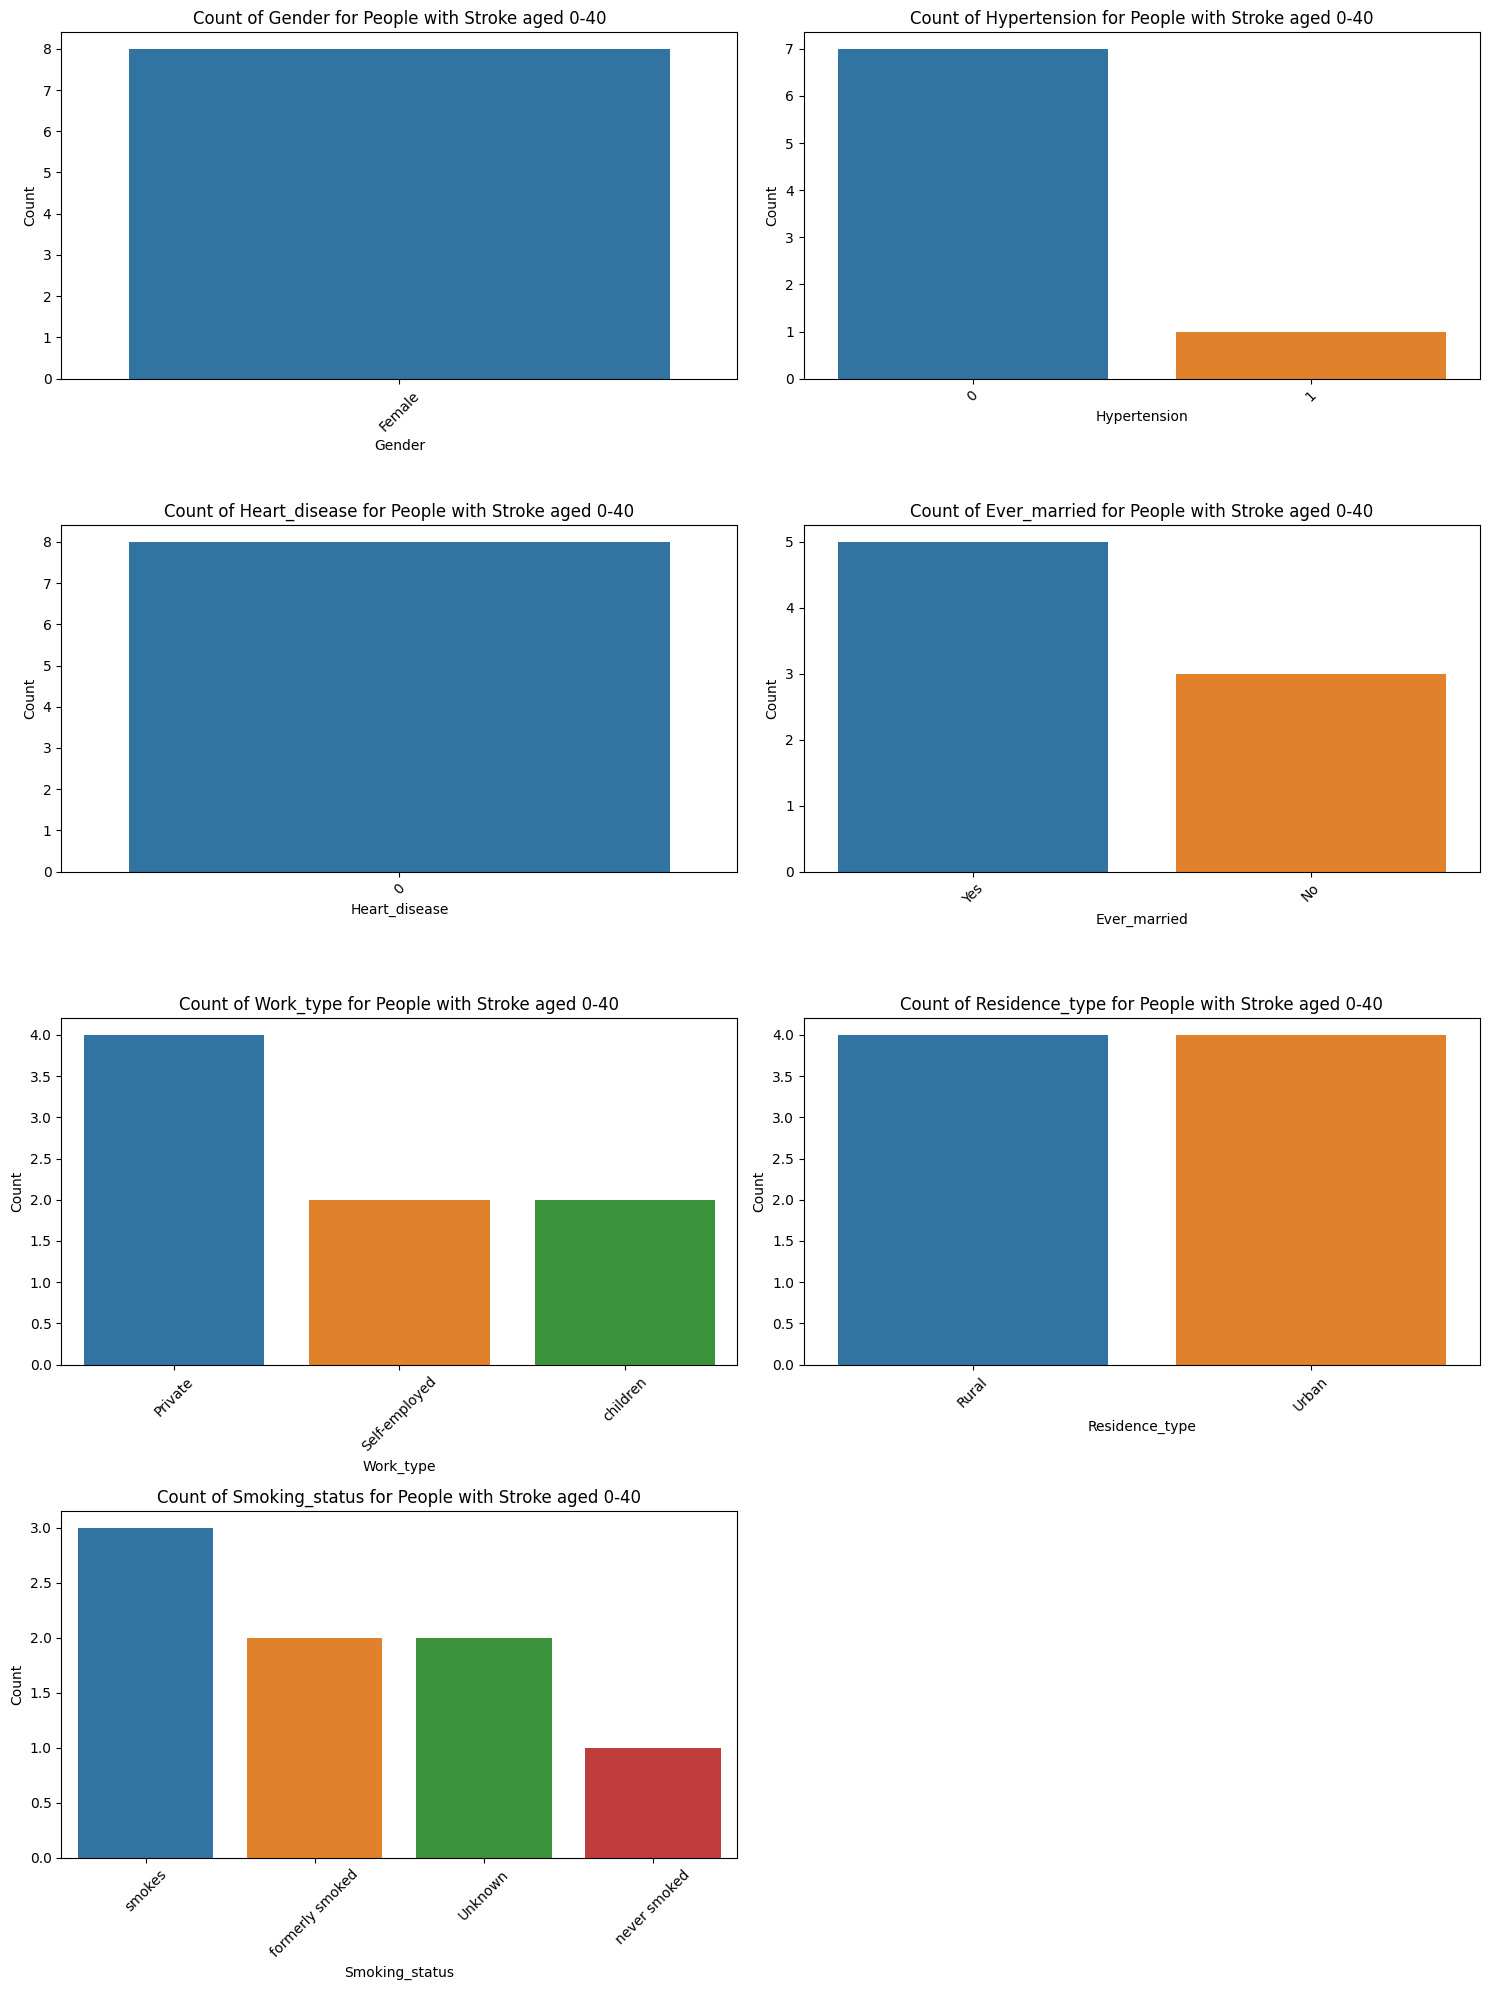

In [41]:
cat_vars_0_40 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

n_cols = 2
n_rows = int(len(cat_vars_0_40) / n_cols) + (len(cat_vars_0_40) % n_cols > 0)
plt.figure(figsize=(15, 20))

# Loop to create the countplots
for i, var in enumerate(cat_vars_0_40):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df_stroke_0_40, x=var)
    plt.title(f'Count of {var.capitalize()} for People with Stroke aged 0-40')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

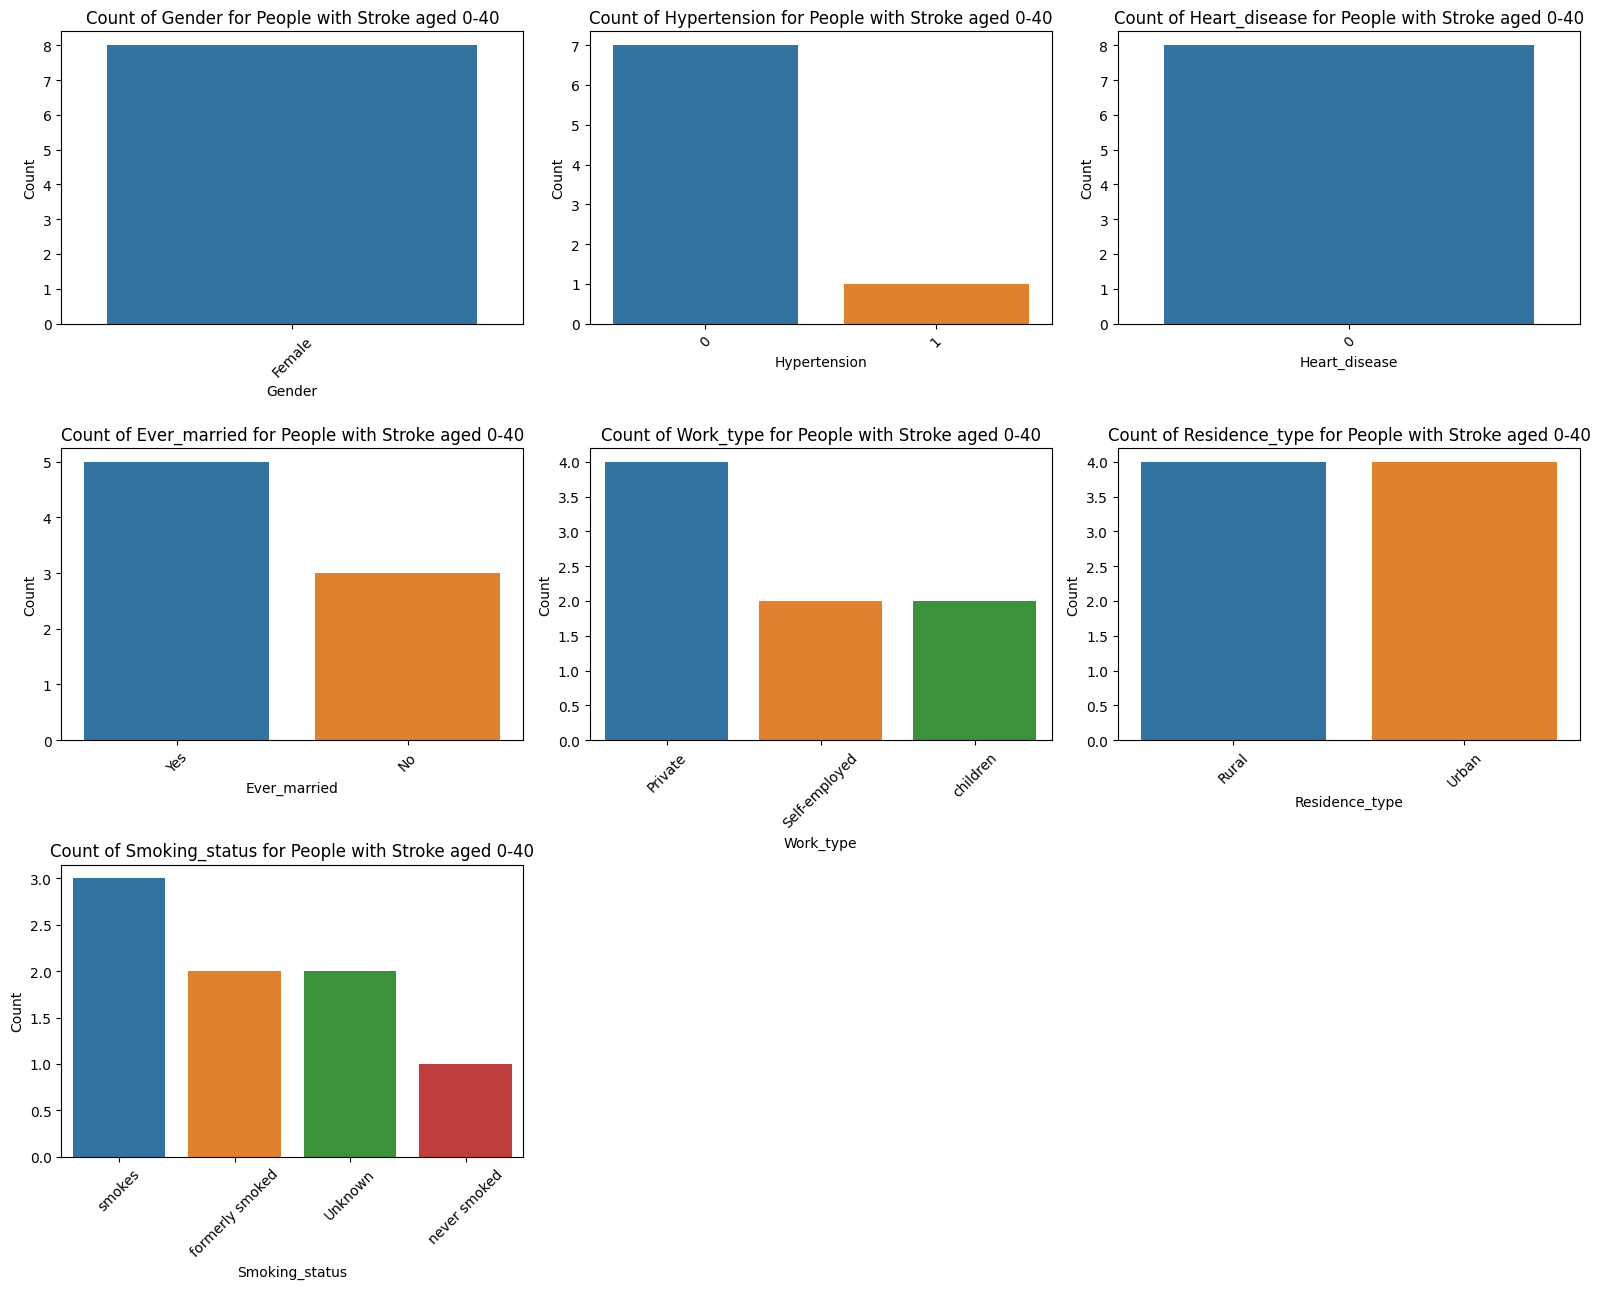

In [42]:
cat_vars_0_40 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

n_cols = 3
n_rows = int(len(cat_vars_0_40) / n_cols) + (len(cat_vars_0_40) % n_cols > 0)
plt.figure(figsize=(16, 13))

# Loop to create the countplots
for i, var in enumerate(cat_vars_0_40):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df_stroke_0_40, x=var)
    plt.title(f'Count of {var.capitalize()} for People with Stroke aged 0-40')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


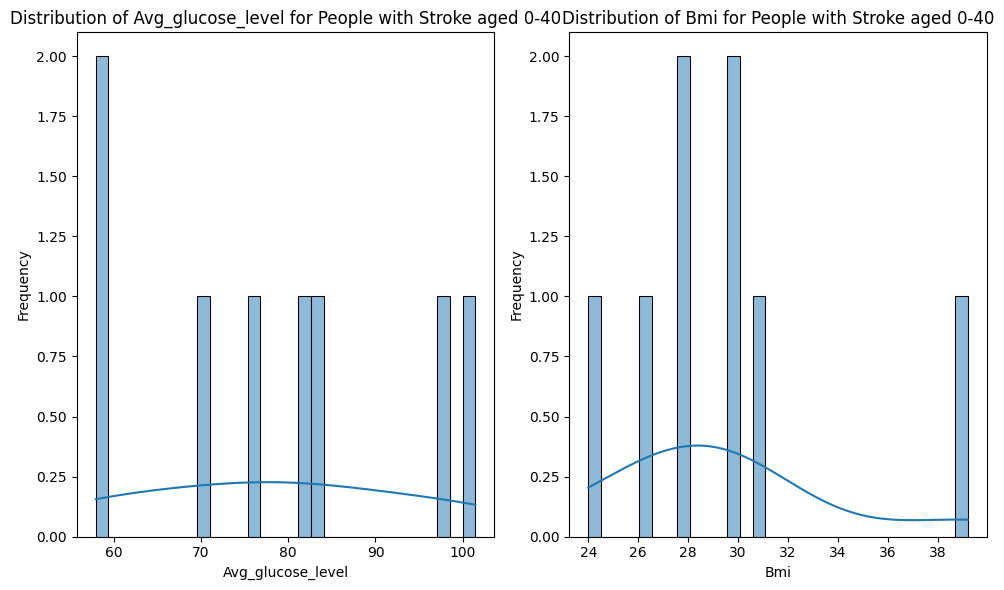

In [43]:
num_vars_0_40 = ['avg_glucose_level', 'bmi']

n_cols = 2
n_rows = int(len(num_vars_0_40) / n_cols) + (len(num_vars_0_40) % n_cols > 0)
plt.figure(figsize=(10, 6))

# Loop to create the histograms
for i, var in enumerate(num_vars_0_40):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data=df_stroke_0_40, x=var, kde=True, bins=30)
    plt.title(f'Distribution of {var.capitalize()} for People with Stroke aged 0-40')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


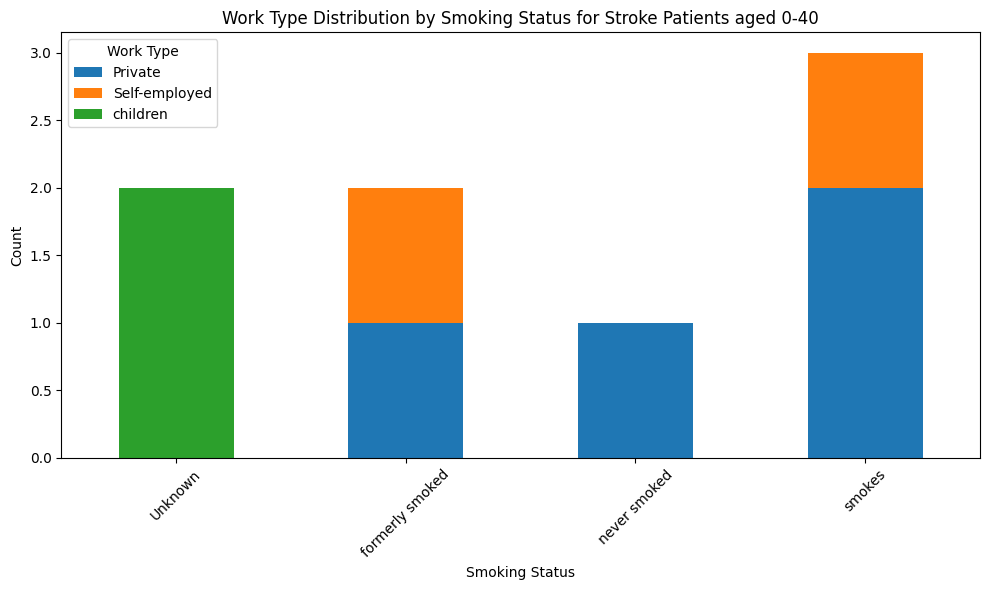

In [44]:
work_type_smoker1 = pd.crosstab(df_stroke_0_40['smoking_status'], df_stroke_0_40['work_type'])

work_type_smoker1.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Work Type Distribution by Smoking Status for Stroke Patients aged 0-40')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Work Type')
plt.tight_layout()
plt.show()

In [45]:
work_type_smoker = pd.crosstab(df_stroke_0_40['work_type'], df_stroke_0_40['smoking_status'])

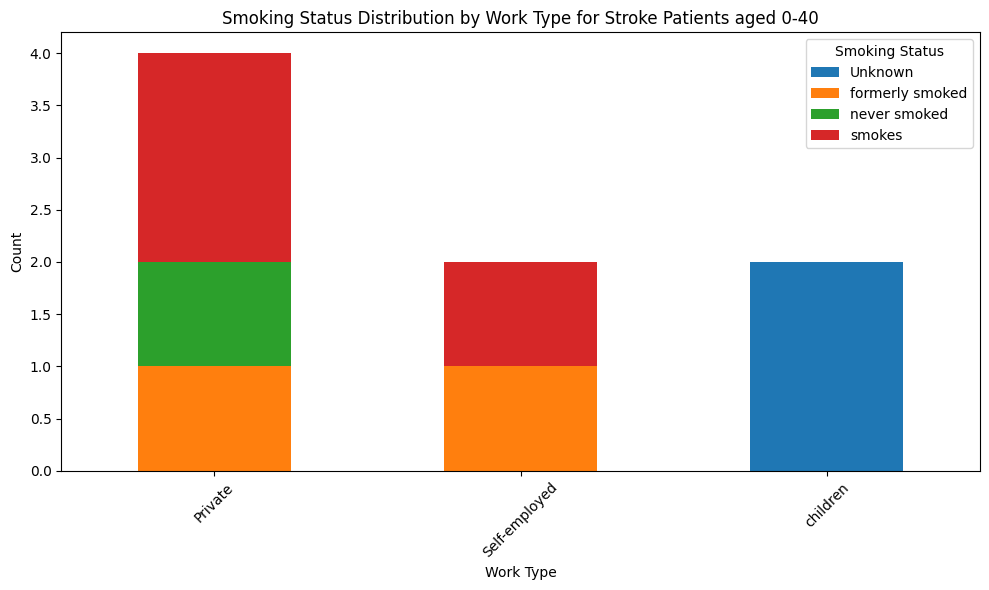

In [46]:
work_type_smoker.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Smoking Status Distribution by Work Type for Stroke Patients aged 0-40')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Smoking Status')
plt.tight_layout()
plt.show()

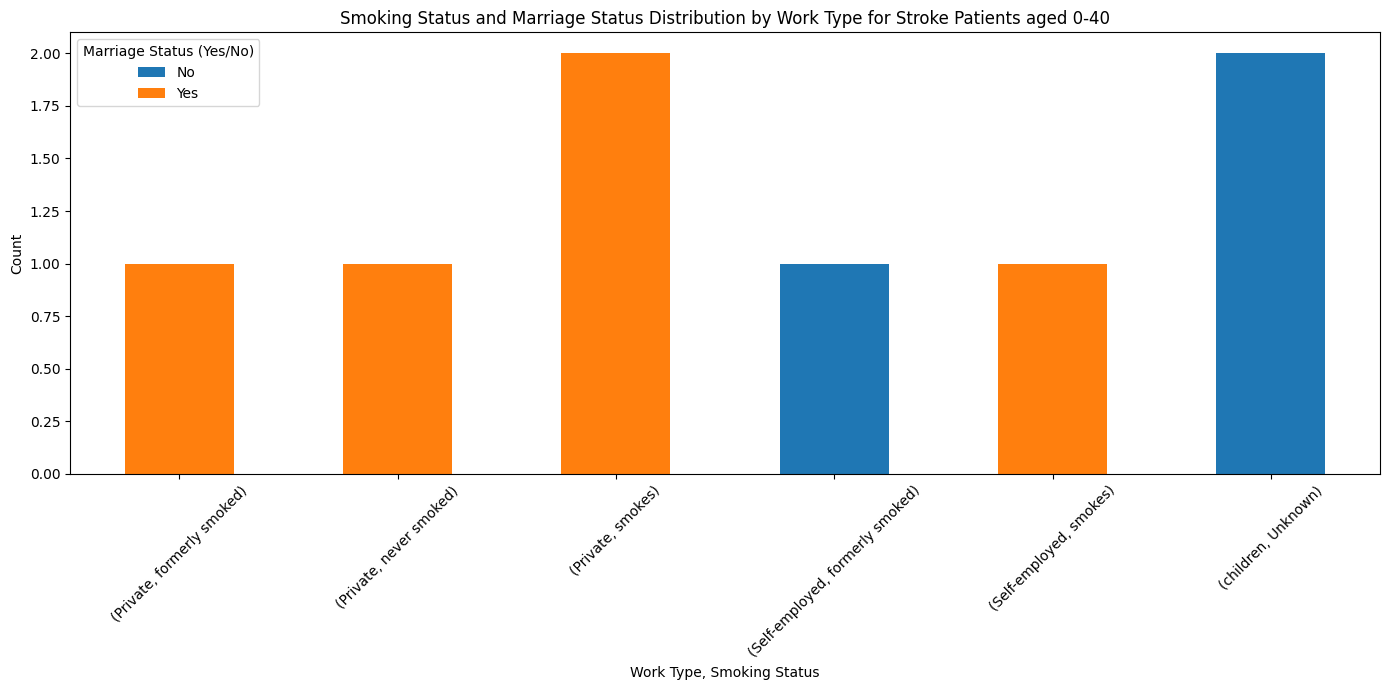

In [47]:
ct = pd.crosstab([df_stroke_0_40['work_type'], df_stroke_0_40['smoking_status']],
                 df_stroke_0_40['ever_married'],
                 aggfunc='size',
                 values=df_stroke_0_40['ever_married'])

ct.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Smoking Status and Marriage Status Distribution by Work Type for Stroke Patients aged 0-40')
plt.xlabel('Work Type, Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marriage Status (Yes/No)')
plt.tight_layout()
plt.show()
